In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
df = pd.read_csv('dao_maker_launches.csv', sep='\t')
df

# change columns' names
# raised money - number only
# roi - number only
# Get the month of launch date
# fill na

,Unnamed: 0,raised,ROI_ATH,catg,vc,mm,cap_controlled,dao_approve,id,launch_date,platform,total_supply,fear_greed_val,month
0,gamium,"$200,000",43x,Metaverse,DAO Maker,DAO Maker,0.0,0.0,gamium,30/03/22,binance-smart-chain,6.324101e+09,55,3
1,adaswap,"$195,000",12x,DeFi,Shima Capital,MarketMaker.io,0.0,0.0,adaswap,05/04/22,ethereum,1.000000e+10,53,4
2,step-app,"$2,750,000",149x,Move To Earn,NaN,Kairon Labs,1.0,1.0,step-app-fitfi,26/04/22,avalanche,5.000000e+09,27,4
3,dragon-sb,"$195,000",9x,Gaming,DnR Labs,NaN,0.0,1.0,dragonsb,15/03/22,binance-smart-chain,9.500000e+07,21,3
4,defiato,"$600,000",2x,DeFi,CRC,MarketMaker.io,0.0,1.0,defiato,16/12/20,ethereum,2.500000e+08,92,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,dao-maker,"$3,900,000",87x,Launchpad,NaN,NaN,0.0,0.0,dao-maker,09/02/21,ethereum,2.775240e+08,95,2
89,anrkey-x,"$125,000",19x,DeFi,NaN,NaN,0.0,0.0,anrkey-x,18/12/20,ethereum,2.000000e+08,95,12
90,plotx,"$250,000",8x,DeFi,NaN,NaN,0.0,0.0,plotx,14/10/20,ethereum,2.000000e+08,53,10
91,definer,"$96,000",5x,DeFi,NaN,NaN,0.0,0.0,definer,12/10/20,ethereum,1.680000e+08,52,10


In [73]:
# Get the month of public listing
df['month'] = df['launch_date'].apply(lambda x: int(x[3:5]))

In [74]:
# Change the names of columns
columns = ['name', 'money_raised', 'ATH_ROI', 'catg', 'VC', 'MM', 'cap_controlled', 
           'dao_approved', 'cg_id', 'launch_date', 'chain', 'total_supply', 'btc_f&g_index', 'launch_month']

df.columns = columns

In [75]:
# cast the money_raised column to int
df['money_raised'] = df['money_raised'].apply(lambda x: int(x[1:].replace(',', '')))

In [76]:
# cast the atH_roi column to int
df['ATH_ROI'] = df['ATH_ROI'].apply(lambda x: int(x[:-1]))

<AxesSubplot:>

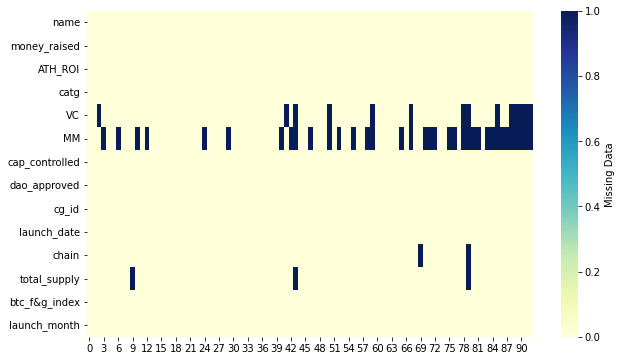

In [77]:
# Find na values
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [78]:
# It is reasonable to fill VC and MM column with '0' as the data is not missing
# the NA is data itself
df[['VC', 'MM']] = df[['VC', 'MM']].fillna('0')

In [79]:
# Having a quick look at the projects it turns out that both of them are network itself
# That's why 'own' chain would would be fair
df[df['chain'].isna()]

,name,money_raised,ATH_ROI,catg,VC,MM,cap_controlled,dao_approved,cg_id,launch_date,chain,total_supply,btc_f&g_index,launch_month
69,sienna,800000,9,DeFi,Magnus Capital,Skynet Trading,0.0,1.0,sienna,07/09/21,NaN,10000000.0,79,9
79,orao-network,850000,3,Blockchain Service,0,0,0.0,0.0,orao-network,03/05/21,NaN,NaN,61,5


In [80]:
df['chain'] = df['chain'].fillna('own')

In [81]:
df[df['total_supply'].isna()]

,name,money_raised,ATH_ROI,catg,VC,MM,cap_controlled,dao_approved,cg_id,launch_date,chain,total_supply,btc_f&g_index,launch_month
9,infinity-skies,200000,1,Gaming,Jump,Jump,0.0,1.0,infinity-skies,14/01/22,polygon-pos,NaN,21,1
43,marnotaur,100000,20,DeFi,0,0,0.0,0.0,marnotaur,25/10/21,binance-smart-chain,NaN,72,10
79,orao-network,850000,3,Blockchain Service,0,0,0.0,0.0,orao-network,03/05/21,own,NaN,61,5


In [82]:
# The information about total supply can be easily found on the whitepaper of each project
df.loc[9, 'total_supply'] =  100000000 
df.loc[43, 'total_supply'] =  150000000
df.loc[79, 'total_supply'] =  1000000000

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            93 non-null     object 
 1   money_raised    93 non-null     int64  
 2   ATH_ROI         93 non-null     int64  
 3   catg            93 non-null     object 
 4   VC              93 non-null     object 
 5   MM              93 non-null     object 
 6   cap_controlled  93 non-null     float64
 7   dao_approved    93 non-null     float64
 8   cg_id           93 non-null     object 
 9   launch_date     93 non-null     object 
 10  chain           93 non-null     object 
 11  total_supply    93 non-null     float64
 12  btc_f&g_index   93 non-null     int64  
 13  launch_month    93 non-null     int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 10.3+ KB


In [84]:
df.to_csv('dao_maker_launches_cleaned.csv', sep='\t')

In [85]:
pd.read_csv('dao_maker_launches_cleaned.csv', sep='\t', index_col='')

,Unnamed: 0,name,money_raised,ATH_ROI,catg,VC,MM,cap_controlled,dao_approved,cg_id,launch_date,chain,total_supply,btc_f&g_index,launch_month
0,0,gamium,200000,43,Metaverse,DAO Maker,DAO Maker,0.0,0.0,gamium,30/03/22,binance-smart-chain,6.324101e+09,55,3
1,1,adaswap,195000,12,DeFi,Shima Capital,MarketMaker.io,0.0,0.0,adaswap,05/04/22,ethereum,1.000000e+10,53,4
2,2,step-app,2750000,149,Move To Earn,0,Kairon Labs,1.0,1.0,step-app-fitfi,26/04/22,avalanche,5.000000e+09,27,4
3,3,dragon-sb,195000,9,Gaming,DnR Labs,0,0.0,1.0,dragonsb,15/03/22,binance-smart-chain,9.500000e+07,21,3
4,4,defiato,600000,2,DeFi,CRC,MarketMaker.io,0.0,1.0,defiato,16/12/20,ethereum,2.500000e+08,92,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,88,dao-maker,3900000,87,Launchpad,0,0,0.0,0.0,dao-maker,09/02/21,ethereum,2.775240e+08,95,2
89,89,anrkey-x,125000,19,DeFi,0,0,0.0,0.0,anrkey-x,18/12/20,ethereum,2.000000e+08,95,12
90,90,plotx,250000,8,DeFi,0,0,0.0,0.0,plotx,14/10/20,ethereum,2.000000e+08,53,10
91,91,definer,96000,5,DeFi,0,0,0.0,0.0,definer,12/10/20,ethereum,1.680000e+08,52,10
